In [1]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime 
from pandas_datareader import data

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

### datetime 표준라이브러리

In [3]:
dt = datetime(2021,1,30,5,12,13)
dt

datetime.datetime(2021, 1, 30, 5, 12, 13)

In [4]:
print( dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second )

2021 1 30 5 12 13


In [5]:
cur = datetime.now()
cur

datetime.datetime(2021, 2, 26, 13, 33, 38, 682155)

In [6]:
cur.year

2021

### 시계열데이터의 정의
##### 1.인덱스가 datetime 형
####  2.시계열데이터의 indexing, slicing 을 사용가능

In [13]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1 )
df.index=['2019-01-01','2019-02-01','2019-03-01','2019-04-01',
          '2019-05-01','2019-06-01','2019-07-01','2019-08-01']
# df.index=[datetime(2019,1,1),datetime(2019,2,1),datetime(2019,3,1),
#           datetime(2019,4,1),datetime(2019,5,1),datetime(2019,6,1),
#           datetime(2019,7,1),datetime(2019,8,1) ]

In [11]:
df

,0,1
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


### 문자열을 datetime 형으로 형변환

In [15]:
df.index = pd.to_datetime(df.index)

In [16]:
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# 2019-11-20, 2019/11/20, 2019.11.20
# 2019년11월20일 변환시 에러 발생

In [17]:
df.index=['2019년1월1일','2019년2월1일','2019년3월1일','2019년4월1일',
          '2019년5월1일','2019년6월1일','2019년7월1일','2019년8월1일']

날짜포맷: https://docs.python.org/3/library/datetime.html

In [20]:
df.index = pd.to_datetime(df.index, format='%Y년%m월%d일')

In [22]:
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [24]:
df.columns = ['A','B']
df

,A,B
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


### 이동평균

In [26]:
df.rolling( window=2 ).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,2.0,3.0
2019-03-01,4.0,6.0
2019-04-01,6.0,7.0
2019-05-01,8.0,9.0
2019-06-01,10.0,11.0
2019-07-01,12.0,13.0
2019-08-01,14.0,18.0


In [29]:
df.rolling( window=2 ,min_periods=1).mean()

,A,B
2019-01-01,1.0,2.0
2019-02-01,2.0,3.0
2019-03-01,4.0,6.0
2019-04-01,6.0,7.0
2019-05-01,8.0,9.0
2019-06-01,10.0,11.0
2019-07-01,12.0,13.0
2019-08-01,14.0,18.0


In [27]:
df.rolling( window=3 ).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,NaN,NaN
2019-03-01,3.0,4.666667
2019-04-01,5.0,6.000000
2019-05-01,7.0,8.666667
2019-06-01,9.0,9.333333
2019-07-01,11.0,12.666667
2019-08-01,13.0,15.333333


In [28]:
df

,A,B
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


In [33]:
df.rolling(window=2).mean()['B']

2019-01-01     NaN
2019-02-01     3.0
2019-03-01     6.0
2019-04-01     7.0
2019-05-01     9.0
2019-06-01    11.0
2019-07-01    13.0
2019-08-01    18.0
Name: B, dtype: float64

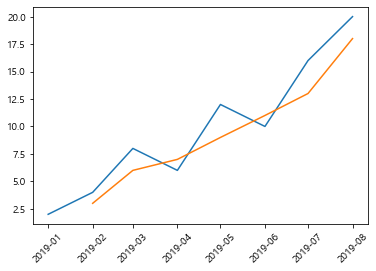

In [34]:
plt.xticks( rotation=45)
plt.plot( df.index, df['B'])
plt.plot( df.index, df.rolling(window=2).mean()['B']  )
plt.show()

In [35]:
lgDF = data.get_data_yahoo('066570.KS', '2017-01-01' )
lgDF

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,52300.0,51600.0,51800.0,51600.0,431474.0,49745.046875
2017-01-03,54400.0,51800.0,51800.0,54300.0,1715000.0,52347.988281
2017-01-04,54500.0,53100.0,54200.0,53800.0,1262418.0,51865.960938
2017-01-05,55700.0,53400.0,54000.0,53600.0,1428250.0,51673.152344
2017-01-06,54000.0,52400.0,53800.0,52600.0,1382362.0,50709.097656
...,...,...,...,...,...,...
2021-02-22,174500.0,164500.0,172500.0,166000.0,2511075.0,166000.000000
2021-02-23,162000.0,157000.0,161000.0,157500.0,2897046.0,157500.000000
2021-02-24,159000.0,149000.0,157500.0,150000.0,3061646.0,150000.000000


In [36]:
lgDF.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18',
               '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26'],
              dtype='datetime64[ns]', name='Date', length=1012, freq=None)

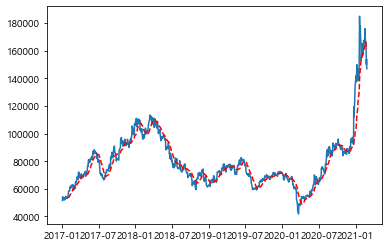

In [40]:
plt.plot( lgDF['Close'] )
plt.plot( lgDF.rolling( window=20).mean()['Close'] ,'r--')
plt.show()

In [39]:
lgDF.rolling( window=20).mean()['Close']

Date
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
                ...   
2021-02-22    165525.0
2021-02-23    164525.0
2021-02-24    163125.0
2021-02-25    162325.0
2021-02-26    161325.0
Name: Close, Length: 1012, dtype: float64

##### 시계열데이터만 적용되는 인덱싱 슬라이싱

In [42]:
lgDF['2019']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,64200.0,62700.0,63300.0,62800.0,568844.0,61540.480469
2019-01-03,64100.0,62100.0,63100.0,62900.0,604561.0,61638.472656
2019-01-04,63400.0,61100.0,63000.0,62200.0,602100.0,60952.511719
2019-01-07,64700.0,62700.0,63100.0,64200.0,660173.0,62912.402344
2019-01-08,63700.0,61200.0,63700.0,61900.0,1338626.0,60658.531250
...,...,...,...,...,...,...
2019-12-23,72600.0,71900.0,72600.0,72500.0,257344.0,71045.929688
2019-12-24,72700.0,71900.0,72500.0,71900.0,220741.0,70457.968750
2019-12-26,72200.0,71200.0,72000.0,71300.0,372424.0,69870.007812


In [43]:
lgDF['2019-01']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,64200.0,62700.0,63300.0,62800.0,568844.0,61540.480469
2019-01-03,64100.0,62100.0,63100.0,62900.0,604561.0,61638.472656
2019-01-04,63400.0,61100.0,63000.0,62200.0,602100.0,60952.511719
2019-01-07,64700.0,62700.0,63100.0,64200.0,660173.0,62912.402344
2019-01-08,63700.0,61200.0,63700.0,61900.0,1338626.0,60658.531250
2019-01-09,63700.0,61600.0,61700.0,63200.0,950285.0,61932.457031
2019-01-10,66000.0,62700.0,63100.0,65600.0,1065551.0,64284.320312
2019-01-11,66500.0,65200.0,65700.0,66000.0,601380.0,64676.300781
2019-01-14,66400.0,65000.0,66000.0,65900.0,401456.0,64578.304688


In [44]:
lgDF['2019-01':'2019-07']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,64200.0,62700.0,63300.0,62800.0,568844.0,61540.480469
2019-01-03,64100.0,62100.0,63100.0,62900.0,604561.0,61638.472656
2019-01-04,63400.0,61100.0,63000.0,62200.0,602100.0,60952.511719
2019-01-07,64700.0,62700.0,63100.0,64200.0,660173.0,62912.402344
2019-01-08,63700.0,61200.0,63700.0,61900.0,1338626.0,60658.531250
...,...,...,...,...,...,...
2019-07-25,70400.0,69300.0,69800.0,69700.0,458863.0,68302.093750
2019-07-26,69600.0,68100.0,69000.0,68600.0,614213.0,67224.156250
2019-07-29,69700.0,68000.0,68300.0,68600.0,377474.0,67224.156250


In [46]:
lgDF['2019-01-01':'2019-01-20']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,64200.0,62700.0,63300.0,62800.0,568844.0,61540.480469
2019-01-03,64100.0,62100.0,63100.0,62900.0,604561.0,61638.472656
2019-01-04,63400.0,61100.0,63000.0,62200.0,602100.0,60952.511719
2019-01-07,64700.0,62700.0,63100.0,64200.0,660173.0,62912.402344
2019-01-08,63700.0,61200.0,63700.0,61900.0,1338626.0,60658.531250
2019-01-09,63700.0,61600.0,61700.0,63200.0,950285.0,61932.457031
2019-01-10,66000.0,62700.0,63100.0,65600.0,1065551.0,64284.320312
2019-01-11,66500.0,65200.0,65700.0,66000.0,601380.0,64676.300781
2019-01-14,66400.0,65000.0,66000.0,65900.0,401456.0,64578.304688


In [47]:
lgDF[:'2018']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,52300.0,51600.0,51800.0,51600.0,431474.0,49745.046875
2017-01-03,54400.0,51800.0,51800.0,54300.0,1715000.0,52347.988281
2017-01-04,54500.0,53100.0,54200.0,53800.0,1262418.0,51865.960938
2017-01-05,55700.0,53400.0,54000.0,53600.0,1428250.0,51673.152344
2017-01-06,54000.0,52400.0,53800.0,52600.0,1382362.0,50709.097656
...,...,...,...,...,...,...
2018-12-21,62900.0,61800.0,62000.0,62400.0,829833.0,60400.351562
2018-12-24,62400.0,61200.0,62000.0,61800.0,513348.0,59819.578125
2018-12-26,61900.0,60600.0,61000.0,61300.0,453037.0,59335.601562


In [48]:
lgDF.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Date', length=1012)

In [49]:
lgDF['year'] = lgDF.index.year

In [51]:
lgDF.groupby( 'year').mean()

,High,Low,Open,Close,Volume,Adj Close
year,,,,,,
2017,78025.104603,75815.062762,76893.723849,76900.000000,1.170548e+06,74139.027180
2018,87734.297521,85002.479339,86464.049587,86163.636364,8.202757e+05,83408.623063
2019,71442.857143,69793.469388,70632.244898,70589.795918,6.438270e+05,69180.160635
2020,74923.588710,72375.604839,73572.379032,73651.209677,1.241898e+06,72951.676443
2021,162697.368421,153000.000000,157473.684211,157434.210526,4.103668e+06,157434.210526


In [52]:
lgDF.groupby( lgDF.index.year ).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017,78025.104603,75815.062762,76893.723849,76900.000000,1.170548e+06,74139.027180,2017
2018,87734.297521,85002.479339,86464.049587,86163.636364,8.202757e+05,83408.623063,2018
2019,71442.857143,69793.469388,70632.244898,70589.795918,6.438270e+05,69180.160635,2019
2020,74923.588710,72375.604839,73572.379032,73651.209677,1.241898e+06,72951.676443,2020
2021,162697.368421,153000.000000,157473.684211,157434.210526,4.103668e+06,157434.210526,2021


In [53]:
lgDF.groupby( [lgDF.index.year,lgDF.index.month] ).mean()

High            Low           Open          Close  \
Date Date                                                               
2017 1      54080.000000   52590.000000   53210.000000   53365.000000   
     2      61450.000000   59850.000000   60750.000000   60760.000000   
     3      67813.636364   65972.727273   66990.909091   67000.000000   
     4      70930.000000   69255.000000   70190.000000   70020.000000   
     5      80536.842105   78557.894737   79436.842105   79768.421053   
     6      85895.238095   83457.142857   84790.476190   84619.047619   
     7      72700.000000   70880.952381   72076.190476   71280.952381   
     8      74877.272727   72759.090909   73672.727273   74159.090909   
     9      86580.000000   83975.000000   85345.000000   85150.000000   
     10     93443.750000   89775.000000   91187.500000   91356.250000   
     11     93955.000000   91480.000000   92655.000000   92570.000000   
     12    100727.777778   97477.777778   98750.000000   99172.222222   
2018 1     109119.047619  104761.904762  107285.714286  106809.523810   
     2     101555.555556   98338.888889   99977.777778   99733.333333   
     3     110500.000000  107428.571429  108947.619048  109071.428571   
     4     108047.619048  104404.761905  106500.000000  105595.238095   
     5      99125.000000   96410.000000   98040.000000   97300.000000   
     6      88831.578947   86057.894737   87557.894737   87000.000000   
     7      79890.909091   77109.090909   78581.818182   78331.818182   
     8      76177.272727   73954.545455   75113.636364   75113.636364   
     9      73629.411765   71835.294118   72752.941176   72323.529412   
     10     66166.666667   64014.285714   64980.952381   64985.714286   
     11     70985.714286   69071.428571   69871.428571   70104.761905   
     12     67736.842105   65752.631579   66994.736842   66536.842105   
2019 1      66477.272727   64495.454545   65445.454545   65463.636364   
     2      71617.647059   69652.941176   70588.235294   70670.588235   
     3      75940.000000   73730.000000   74775.000000   74790.000000   
     4      76872.727273   75018.181818   76072.727273   75836.363636   
     5      75476.190476   73480.952381   74352.380952   74519.047619   
     6      81215.789474   79221.052632   80384.210526   80221.052632   
     7      72208.695652   70613.043478   71652.173913   71130.434783   
     8      61400.000000   60142.857143   60661.904762   60595.238095   
     9      65200.000000   63763.157895   64357.894737   64657.894737   
     10     69214.285714   67933.333333   68638.095238   68466.666667   
     11     70375.000000   69125.000000   69760.000000   69845.000000   
     12     71770.000000   70770.000000   71300.000000   71395.000000   
2020 1      69610.000000   68165.000000   68975.000000   68745.000000   
     2      66510.000000   65090.000000   65845.000000   65795.000000   
     3      54238.636364   51922.727273   53172.727273   52725.000000   
     4      53510.000000   51957.500000   52717.500000   52777.500000   
     5      56863.157895   55384.210526   56126.315789   56305.263158   
     6      66127.272727   63900.000000   64990.909091   65186.363636   
     7      71965.217391   69795.652174   70873.913043   70839.130435   
     8      86200.000000   82180.000000   83900.000000   84280.000000   
     9      91180.952381   87971.428571   89471.428571   89576.190476   
     10     92215.789474   89536.842105   91047.368421   90531.578947   
     11     88133.333333   86228.571429   87409.523810   86995.238095   
     12    103004.761905   96961.904762   98890.476190  100585.714286   
2021 1     159925.000000  148150.000000  153025.000000  153675.000000   
     2     165777.777778  158388.888889  162416.666667  161611.111111   

                 Volume      Adj Close  year  
Date Date                                     
2017 1     9.578222e+05   51446.600391  2017  
     2     1.082006e+06   58575.760547  2017  
     3     1.266034e+06   64591.441

### resampl (시계열데이터 집계전용함수)

In [55]:
lgDF.resample( 'A' ).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-12-31,78025.104603,75815.062762,76893.723849,76900.000000,1.170548e+06,74139.027180,2017
2018-12-31,87734.297521,85002.479339,86464.049587,86163.636364,8.202757e+05,83408.623063,2018
2019-12-31,71442.857143,69793.469388,70632.244898,70589.795918,6.438270e+05,69180.160635,2019
2020-12-31,74923.588710,72375.604839,73572.379032,73651.209677,1.241898e+06,72951.676443,2020
2021-12-31,162697.368421,153000.000000,157473.684211,157434.210526,4.103668e+06,157434.210526,2021


In [56]:
lgDF.resample( 'M' ).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-31,54080.000000,52590.000000,53210.000000,53365.000000,9.578222e+05,51446.600391,2017
2017-02-28,61450.000000,59850.000000,60750.000000,60760.000000,1.082006e+06,58575.760547,2017
2017-03-31,67813.636364,65972.727273,66990.909091,67000.000000,1.266034e+06,64591.441229,2017
2017-04-30,70930.000000,69255.000000,70190.000000,70020.000000,8.959922e+05,67502.875195,2017
2017-05-31,80536.842105,78557.894737,79436.842105,79768.421053,1.069715e+06,76900.854030,2017
2017-06-30,85895.238095,83457.142857,84790.476190,84619.047619,1.130715e+06,81577.106771,2017
2017-07-31,72700.000000,70880.952381,72076.190476,71280.952381,1.257388e+06,68718.497582,2017
2017-08-31,74877.272727,72759.090909,73672.727273,74159.090909,1.190316e+06,71493.171165,2017
2017-09-30,86580.000000,83975.000000,85345.000000,85150.000000,1.489623e+06,82088.973047,2017


In [57]:
# lgDF.resample( 'W-SUN' ).mean()
lgDF.resample( 'W' ).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-08,54180.000000,52460.000000,53120.0,53180.000000,1.243901e+06,51268.249219,2017.0
2017-01-15,53200.000000,51760.000000,52460.0,52720.000000,9.682642e+05,50824.789062,2017.0
2017-01-22,53880.000000,52800.000000,53220.0,53500.000000,7.149776e+05,51576.746875,2017.0
2017-01-29,54900.000000,53325.000000,54175.0,53725.000000,7.860158e+05,51793.659180,2017.0
2017-02-05,58050.000000,55975.000000,56625.0,57450.000000,1.566934e+06,55384.750977,2017.0
...,...,...,...,...,...,...,...
2021-01-31,174300.000000,164400.000000,171300.0,166500.000000,3.504838e+06,166500.000000,2021.0
2021-02-07,162500.000000,155100.000000,159200.0,159300.000000,2.798456e+06,159300.000000,2021.0
2021-02-14,166666.666667,158333.333333,160000.0,161833.333333,3.006262e+06,161833.333333,2021.0


In [58]:
lgDF.resample( 'W-MON' ).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-02,52300.000000,51600.000000,51800.000000,51600.000000,4.314740e+05,49745.046875,2017.0
2017-01-09,54440.000000,52380.000000,53220.000000,53580.000000,1.468784e+06,51653.870313,2017.0
2017-01-16,53140.000000,51900.000000,52580.000000,52560.000000,7.934206e+05,50670.540625,2017.0
2017-01-23,54120.000000,53080.000000,53460.000000,53620.000000,6.478072e+05,51692.433594,2017.0
2017-01-30,55033.333333,53333.333333,54200.000000,53833.333333,9.327480e+05,51898.097656,2017.0
...,...,...,...,...,...,...,...
2021-02-01,169900.000000,159500.000000,166500.000000,162500.000000,3.686148e+06,162500.000000,2021.0
2021-02-08,163400.000000,156500.000000,160100.000000,159100.000000,2.454132e+06,159100.000000,2021.0
2021-02-15,169166.666667,161000.000000,164166.666667,164500.000000,3.078951e+06,164500.000000,2021.0


In [59]:
lgDF.resample( 'Q' ).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-03-31,61330.645161,59680.645161,60532.258065,60588.709677,1.107247e+06,58410.627835,2017
2017-06-30,79210.000000,77171.666667,78228.333333,78216.666667,1.033158e+06,75404.882878,2017
2017-09-30,77866.666667,75693.650794,76846.031746,76688.888889,1.307691e+06,73932.026600,2017
2017-12-31,96061.111111,92974.074074,94251.851852,94411.111111,1.235882e+06,91032.554109,2017
2018-03-31,107333.333333,103768.333333,105675.000000,105478.333333,7.819791e+05,102098.215755,2018
2018-06-30,98988.333333,95930.000000,97681.666667,96941.666667,7.866142e+05,93835.110937,2018
2018-09-30,76806.557377,74501.639344,75706.557377,75496.721311,1.000121e+06,73077.382941,2018
2018-12-31,68314.754098,66296.721311,67291.803279,67231.147541,7.112089e+05,65101.095415,2018
2019-03-31,71166.101695,69111.864407,70089.830508,70125.423729,8.646669e+05,68718.983514,2019


In [50]:
lgDF

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-02,52300.0,51600.0,51800.0,51600.0,431474.0,49745.046875,2017
2017-01-03,54400.0,51800.0,51800.0,54300.0,1715000.0,52347.988281,2017
2017-01-04,54500.0,53100.0,54200.0,53800.0,1262418.0,51865.960938,2017
2017-01-05,55700.0,53400.0,54000.0,53600.0,1428250.0,51673.152344,2017
2017-01-06,54000.0,52400.0,53800.0,52600.0,1382362.0,50709.097656,2017
...,...,...,...,...,...,...,...
2021-02-22,174500.0,164500.0,172500.0,166000.0,2511075.0,166000.000000,2021
2021-02-23,162000.0,157000.0,161000.0,157500.0,2897046.0,157500.000000,2021
2021-02-24,159000.0,149000.0,157500.0,150000.0,3061646.0,150000.000000,2021
